Machine Learning for Stock Predictions

In [2]:
import pandas as pd
import sklearn
import numpy as np
import plotly_express as px
from FinanceData import FinanceData

import sklearn.discriminant_analysis
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.linear_model

In [3]:
# Change path for where the data is being saved or accessed or None if getting but not saving
path: str | None = 'DATA/combined_data3.csv'
# Change get_from_csv to True if saving or False for getting
get_from_csv: bool = False

Get and Organize Data

In [4]:
# Get the data either from a .csv file or load it all from Yahoo Finance
df = pd.DataFrame()
if get_from_csv and path is not None:
    df = FinanceData.get_data_from_csv(path)
elif not get_from_csv:
    save_to_csv = True if path is not None else False
    df = FinanceData.get_data(save_to_csv=save_to_csv, file_path_name=path,most_recent_day=True)
else:
    raise ValueError("Invalid path and get_from_csv variables")

# Display some of the data
display(df.head(5))

# Seperate the data to be predicted from the data to build the model from
is_prediction = df['NextDayChangePercent'].isna()
prediction_data = df[is_prediction]
model_data = df[~is_prediction]

# Seperate features and labels
features = model_data[model_data.columns.difference(['NextDayChangePercent'])]
labels = model_data['NextDayChangePercent']

# Seperate training and testing data
train_data, test_data, train_labels, test_labels = sklearn.model_selection.train_test_split(features, labels, test_size=0.3, random_state=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


1


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


2


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


3


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


4


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


5


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])
[*********************100%%**********************]  1 of 1 completed

6



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


7


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


8


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


9


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


10


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


11


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


12


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


13


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


14


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


15


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ALGN stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
16


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


17


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


18


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


19


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


20


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


21


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


22


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


23


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


24


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for AMTM stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
25


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


26


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


27


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


28


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])
[*********************100%%**********************]  1 of 1 completed

29



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


30


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


31


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for AMP stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
32


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


33


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


34


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


35


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


36


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ANSS stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ANSS stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
37


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


38


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


39


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


40


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


41


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


42


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


43


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


44


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


45


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for AJG stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
46


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for AIZ stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
47


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


48


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


49


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


50


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


51


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for AZO stock on 2024-11-08 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for AZO stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for AZO stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for AZO stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for AZO stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
52


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


53


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for AVY stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
54


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for AXON stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
55


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


56


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


57


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


58


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


59


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


60


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


61


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


62


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


63


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for BLK stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
64


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


65


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


66


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


67


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for BKNG stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for BKNG stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for BKNG stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for BKNG stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
68


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


69


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


70


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


71


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


72


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for BR stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
73


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


74


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-09-12 00:00:00 -> 2024-11-30 00:00:00)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFInvalidPeriodError("%ticker%: Period '5d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFInvalidPeriodError("%ticker%: Period '5d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")


$BF.B: possibly delisted; No price data found  (1d 2024-09-12 00:00:00 -> 2024-11-30 00:00:00)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFInvalidPeriodError("%ticker%: Period '5d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFInvalidPeriodError("%ticker%: Period '5d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']")


'Index' object has no attribute 'tz_localize'
75


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


76


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


77


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


78


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


79


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


80


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


81


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


82


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


83


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


84


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


85


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


86


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


87


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


88


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


89


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


90


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])
[*********************100%%**********************]  1 of 1 completed

91



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


92


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


93


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


94


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


95


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


96


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


97


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


98


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


99


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


100


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


101


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


102


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


103


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


104


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


105


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


106


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for CINF stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for CINF stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
107


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


108


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


109


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


110


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


111


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


112


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


113


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


114


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


115


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


116


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


117


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


118


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


119


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


120


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


121


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


122


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


123


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for COO stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
124


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


125


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


126


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for CPAY stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
127


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


128


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


129


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


130


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


131


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


132


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


133


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


134


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for CMI stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
135


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


136


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


137


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


138


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


139


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


140


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


141


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


142


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


143


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


144


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


145


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


146


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


147


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


148


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


149


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


150


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


151


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


152


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for DPZ stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
153


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for DOV stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
154


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


155


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


156


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


157


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


158


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


159


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


160


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


161


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


162


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


163


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


164


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


165


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


166


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


167


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


168


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


169


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


170


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


171


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for EPAM stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
172


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


173


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


174


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for EQIX stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
175


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


176


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ERIE stock on 2024-11-12 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ERIE stock on 2024-11-11 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ERIE stock on 2024-11-08 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ERIE stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ERIE stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ERIE stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ERIE stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
177


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ESS stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
178


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


179


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for EG stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
180


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


181


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


182


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


183


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


184


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


185


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


186


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


187


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


188


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for FDS stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for FDS stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
189


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for FICO stock on 2024-11-08 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for FICO stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for FICO stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for FICO stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for FICO stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
190


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


191


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


192


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


193


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


194


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


195


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


196


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])
[*********************100%%**********************]  1 of 1 completed

197



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


198


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


199


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


200


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


201


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


202


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


203


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


204


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


205


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


206


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


207


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for IT stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
208


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


209


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


210


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


211


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


212


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


213


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


214


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


215


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


216


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


217


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


218


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


219


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for GL stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
220


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


221


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


222


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


223


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


224


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


225


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


226


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


227


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


228


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


229


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


230


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


231


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


232


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


233


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


234


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


235


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


236


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


237


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


238


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


239


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for HUBB stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
240


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


241


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


242


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


243


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


244


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


245


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for IDXX stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
246


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


247


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


248


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


249


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for PODD stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
250


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


251


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


252


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


253


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


254


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


255


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


256


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


257


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


258


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


259


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


260


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


261


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


262


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


263


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for JKHY stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
264


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for J stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
265


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


266


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


267


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


268


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


269


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


270


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


271


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


272


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


273


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


274


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


275


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


276


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


277


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


278


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for KLAC stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
279


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


280


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


281


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


282


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for LH stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
283


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


284


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


285


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


286


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


287


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


288


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


289


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


290


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


291


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


292


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


293


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


294


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


295


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


296


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


297


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


298


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


299


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for MKTX stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for MKTX stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
300


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


301


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


302


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for MLM stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
303


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


304


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


305


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


306


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


307


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


308


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


309


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


310


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


311


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


312


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


313


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for MTD stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for MTD stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for MTD stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for MTD stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
314


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


315


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


316


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


317


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


318


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


319


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


320


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


321


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for MOH stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
322


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


323


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


324


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


325


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


326


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


327


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


328


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


329


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for MSI stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
330


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for MSCI stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
331


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


332


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


333


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


334


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


335


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


336


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for NWS stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
337


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


338


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


339


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


340


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for NDSN stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NDSN stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NDSN stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NDSN stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
341


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


342


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


343


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for NOC stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
344


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


345


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


346


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


347


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


348


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for NVR stock on 2024-11-11 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NVR stock on 2024-11-08 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NVR stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NVR stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NVR stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for NVR stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
349


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


350


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ORLY stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ORLY stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
351


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


352


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


353


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


354


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


355


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


356


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


357


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


358


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


359


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for PKG stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
360


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


361


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


362


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


363


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


364


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


365


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


366


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


367


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


368


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


369


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


370


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


371


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


372


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


373


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


374


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


375


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for POOL stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for POOL stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
376


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


377


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


378


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


379


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


380


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


381


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


382


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


383


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


384


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for PTC stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
385


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


386


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


387


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


388


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


389


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


390


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


391


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


392


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


393


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


394


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


395


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


396


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for REGN stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
397


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


398


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


399


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


400


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


401


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ROK stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
402


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


403


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ROP stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ROP stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
404


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


405


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


406


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


407


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


408


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


409


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


410


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


411


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


412


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


413


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


414


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


415


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


416


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


417


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


418


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for SNA stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for SNA stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
419


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for SOLV stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
420


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


421


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


422


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


423


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


424


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


425


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


426


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for STE stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
427


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


428


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


429


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


430


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for SNPS stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
431


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


432


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


433


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])
[*********************100%%**********************]  1 of 1 completed

434



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


435


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


436


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


437


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


438


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


439


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for TDY stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TDY stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
440


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


441


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


442


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


443


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


444


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for TPL stock on 2024-11-08 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TPL stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TPL stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TPL stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TPL stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
445


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


446


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


447


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


448


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


449


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


450


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for TDG stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TDG stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
451


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


452


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


453


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


454


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for TYL stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TYL stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TYL stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for TYL stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
455


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


456


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


457


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


458


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


459


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ULTA stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
460


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


461


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


462


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


463


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for URI stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
464


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


465


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


466


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


467


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


468


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


469


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for VRSN stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
470


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for VRSK stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
471


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


472


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


473


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


474


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


475


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


476


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


477


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


478


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


479


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for GWW stock on 2024-11-07 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for GWW stock on 2024-11-06 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for GWW stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for GWW stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
480


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['WAB']: YFChartError('%ticker%: 1m data not available for startTime=1732251600 and endTime=1732942800. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:33: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  data_series = pd.concat([data_series, yf.download(tickers=symbol, s

481


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


482


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


483


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


484


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


485


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


486


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


487


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


488


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


489


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


490


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for WST stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
491


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


492


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


493


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


494


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for WTW stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
495


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


496


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


497


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


498


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


499


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


Index error retrieving data for ZBRA stock on 2024-11-05 00:00:00: single positional indexer is out-of-bounds
Index error retrieving data for ZBRA stock on 2024-11-04 00:00:00: single positional indexer is out-of-bounds
500


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


501


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


502


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\GRAYBILLKB20\OneDrive - Grove City College\Sophomore Year\FinanceData\FinanceData\FinanceDataHelper.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return new_append_df if output_df is None else pd.concat([output_df,new_append_df])


503


RateOfChange  1DayChangePercent  2DaysAgoChangePercent  \
Symbol Date                                                                 
MMM    2024-11-29      1.028816           0.007926              -0.003535   
       2024-11-27      1.001209          -0.003535               0.020181   
       2024-11-26      1.011411           0.020181               0.014795   
       2024-11-25      0.999770           0.014795               0.008640   
       2024-11-22      0.965564           0.008640              -0.004068   

                   3DaysAgoChangePercent  4DaysAgoChangePercent  \
Symbol Date                                                       
MMM    2024-11-29               0.020181               0.014795   
       2024-11-27               0.014795               0.008640   
       2024-11-26               0.008640              -0.004068   
       2024-11-25              -0.004068              -0.002730   
       2024-11-22              -0.002730              -0.015211   

                   5DaysAgoChangePercent  6DaysAgoChangePercent  \
Symbol Date                                                       
MMM    2024-11-29               0.008640              -0.004068   
       2024-11-27              -0.004068              -0.002730   
       2024-11-26              -0.002730              -0.015211   
       2024-11-25              -0.015211               0.002928   
       2024-11-22               0.002928              -0.019120   

                   7DaysAgoChangePercent  8DaysAgoChangePercent  \
Symbol Date                                                       
MMM    2024-11-29              -0.002730              -0.015211   
       2024-11-27              -0.015211               0.002928   
       2024-11-26               0.002928              -0.019120   
       2024-11-25              -0.019120               0.006619   
       2024-11-22               0.006619               0.008439   

                   9DaysAgoChangePercent  ...  12DaysAgoChangePercent  \
Symbol Date                               ...                           
MMM    2024-11-29               0.002928  ...                0.008439   
       2024-11-27              -0.019120  ...               -0.019925   
       2024-11-26               0.006619  ...               -0.009975   
       2024-11-25               0.008439  ...                0.009544   
       2024-11-22              -0.019925  ...               -0.006347   

                   13DaysAgoChangePercent  14DaysAgoChangePercent  \
Symbol Date                                                         
MMM    2024-11-29               -0.019925               -0.009975   
       2024-11-27               -0.009975                0.009544   
       2024-11-26                0.009544               -0.006347   
       2024-11-25               -0.006347                0.058489   
       2024-11-22                0.058489                0.005324   

                   1MinChangePercent  5MinChangePercent  30MinChangePercent  \
Symbol Date                                                                   
MMM    2024-11-29          -0.000075          -0.000187            0.001724   
       2024-11-27           0.000453          -0.000905           -0.001658   
       2024-11-26           0.000301          -0.001240            0.000640   
       2024-11-25           0.002153           0.002770            0.006643   
       2024-11-22           0.000078           0.000350            0.002419   

                   1HourChangePercent  5HourChangePercent  \
Symbol Date                                                 
MMM    2024-11-29            0.003190            0.003567   
       2024-11-27           -0.004134           -0.014652   
       2024-11-26            0.001243            0.021397   
       2024-11-25            0.010116            0.013691   
       2024-11-22            0.004458            0.012694   

                   10HourChangePercent  NextDayChangePercent  
Symbol Date                 

Create LDA Model

In [5]:
# Use sklearn to create LDA model
model = sklearn.linear_model.LinearRegression()
model.fit(train_data, train_labels)

LinearRegression()

Run Model on Test Data

In [6]:

test_labels_prediction = model.predict(test_data)
actual_and_predicted = pd.DataFrame({'actual':test_labels,'predicted':test_labels_prediction})

Plot Test Data

In [7]:
fig = px.scatter(x=actual_and_predicted['actual'], y=actual_and_predicted['predicted'], hover_data={'Symbol' : test_labels.index.get_level_values(0), 'Date' : test_labels.index.get_level_values(1)})
fig.update_layout(xaxis_title='Actual Change', yaxis_title='Predicted Change')
fig.show()

(-0.05, 0.05)

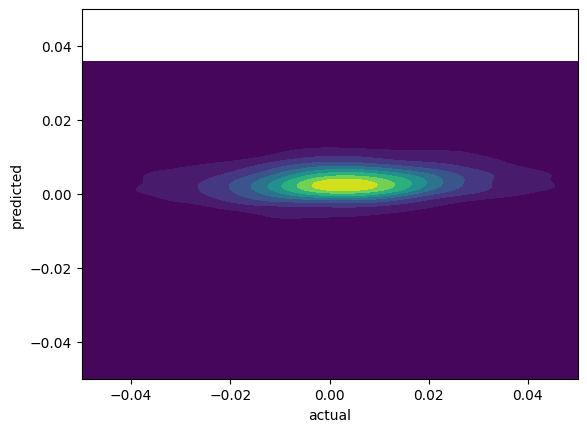

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(x=actual_and_predicted['actual'], y=actual_and_predicted['predicted'], fill=True, cmap="viridis", thresh=0, levels=10)
plt.xlim(-.05,.05)
plt.ylim(-.05,.05)
plt.axhline()
plt.axvline()

Make Predictions

In [9]:
prediction_result = pd.Series(model.predict(prediction_data[prediction_data.columns.difference(['NextDayChangePercent'])]))
prediction_result.index = prediction_data.index.get_level_values(0)

prediction_result = prediction_result.sort_values(ascending=False)

display(prediction_result.head(10))

Symbol
TSLA    0.016095
PLTR    0.015169
GEV     0.013966
FSLR    0.013682
CHTR    0.009358
HWM     0.009190
ADM     0.009158
ALB     0.008972
FTNT    0.008637
RCL     0.008629
dtype: float64